# Computational Finance - Group Assignment
### Autors: 
- Tiago Bellas
- Renato Garofalo Morais
- Catarina da Graça Badi
- Fernando Tiago Lopo Reis
- Luís Filipe Ribeiro

# 1. [15.0] Consider the following bond market information for a set of Treasury government bonds:


In [1]:
# Dataframe Bonds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({
    'Bond': [1, 2, 3, 4, 5, 6, 7, 8, 9,10],
    'Coupon rate': [0.015, 0.0175, 0.02, 0.0225, 0.025, 0.0275, 0.03, 0.0325, 0.035, 0.0375],
    'Coupon frequency': ['Annual', 'Annual', 'Annual', 'Annual', 'Annual', 'Annual', 'Annual', 'Annual', 'Annual', 'Annual'],
    'Maturity': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Dirty-price': [96.6, 93.71, 91.56, 90.24, 89.74, 90.04, 91.09, 92.82, 95.19, 98.14]
})

In [3]:
df

,Bond,Coupon rate,Coupon frequency,Maturity,Dirty-price
0,1,0.0150,Annual,1,96.60
1,2,0.0175,Annual,2,93.71
2,3,0.0200,Annual,3,91.56
3,4,0.0225,Annual,4,90.24
4,5,0.0250,Annual,5,89.74
5,6,0.0275,Annual,6,90.04
6,7,0.0300,Annual,7,91.09
7,8,0.0325,Annual,8,92.82
8,9,0.0350,Annual,9,95.19
9,10,0.0375,Annual,10,98.14


### a) [1.0] Build a class called YieldCurve that will receive an array with information on maturity, price and coupon for n bonds (n x 3)

In [4]:
class Bond:
    
    def __init__(self, maturity, price, coupon):
        self.maturity = maturity
        self.price = price
        self.coupon = coupon
    
    def print(self):
        print(f"Maturity: {self.maturity} years, Price: {self.price}, Coupon: {self.coupon}%")

In [5]:
class YieldCurve:
    
    def __init__(self, bonds):
        self.bonds = bonds

In [6]:
bonds = []
for year in range(len(df)):
    #extrair os campos por índice
    maturity = df['Maturity'].iloc[year]
    price = df['Dirty-price'].iloc[year]
    coupon = df['Coupon rate'].iloc[year]*100 #na df é a rate
    
    #adicionar aos bonds
    bond = Bond(maturity, price, coupon)
    bonds.append(bond)

    #printar o bond
    bond.print()

Maturity: 1 years, Price: 96.6, Coupon: 1.5%
Maturity: 2 years, Price: 93.71, Coupon: 1.7500000000000002%
Maturity: 3 years, Price: 91.56, Coupon: 2.0%
Maturity: 4 years, Price: 90.24, Coupon: 2.25%
Maturity: 5 years, Price: 89.74, Coupon: 2.5%
Maturity: 6 years, Price: 90.04, Coupon: 2.75%
Maturity: 7 years, Price: 91.09, Coupon: 3.0%
Maturity: 8 years, Price: 92.82, Coupon: 3.25%
Maturity: 9 years, Price: 95.19, Coupon: 3.5000000000000004%
Maturity: 10 years, Price: 98.14, Coupon: 3.75%


In [7]:
yield_curve = YieldCurve(bonds)

### b) [2.0] Add a method that will bootstrap the discount factors using matrix operations

### c) [2.0] Add a method that will bootstrap the discount factors using a global solver

### d) [2.0] Add a method that will bootstrap the discount factors using an iterative procedure

In [8]:
from scipy.optimize import root

class YieldCurve:

    def __init__(self, bonds):
        self.bonds = bonds

    """ 
    Calculating cashflows em matrix NxN
    """
    def cashflows(self):
        number_of_bonds = len(self.bonds)
        cashflows = np.zeros( (number_of_bonds, number_of_bonds) )

        for i in range(number_of_bonds):
            bond = self.bonds[i]
            cashflows[i][0:bond.maturity] = bond.coupon
            cashflows[i][bond.maturity-1] = 100 + bond.coupon
        
        return cashflows


    """
    b) Add a method that will bootstrap the discount factors using matrix operations
    """
    def bootstrap_discount_factors_matrix(self):
        cashflows = self.cashflows()
        prices = [bond.price for bond in self.bonds]
        return np.linalg.solve(cashflows, prices)
    
    """
    c) Add a method that will bootstrap the discount factors using a global solver
    """
    def bootstrap_discount_factors_global_solver(self):
        # Ponto de começo
        discount_factors_initial_guess = np.ones(len(self.bonds))

        # Queremos calcular os dfs tal que dfs*cfs = preço  => preço-preço real = 0
        def bond_price_error(dfs):
            prices = np.dot(self.cashflows(), dfs)
            return prices - np.array([bond.price for bond in self.bonds])

        result = root(bond_price_error, discount_factors_initial_guess)
        return result.x

    """
    d) Add a method that will bootstrap the discount factors using an iterative procedure
    """
    def bootstrap_discount_factors_iterative(self):
        # Ponto de partida...
        discount_factors = np.ones(len(self.bonds))

        def calculate_price_error(dfs):
            current_prices = np.dot(self.cashflows(), dfs)
            return current_prices - np.array([bond.price for bond in self.bonds])

        tolerance = 1e-6
        price_error = calculate_price_error(discount_factors)

        while np.sum(np.abs(price_error)) > tolerance:
            # Calcular erro dos preços
            price_error = calculate_price_error(discount_factors)
            
            """
            Esta linha serve para calcular os decrementos necessários para os DCF.
            Dado que a soma dos CF*DCF = DP então para irmos ajustando o DCF até ser verdade,
            igualando CF à diferença de preços para obter a diferença necessária no DCF 
            """
            discount_factors -= np.linalg.solve(self.cashflows(), price_error)
                
        return discount_factors

        

        

In [9]:
yield_curve = YieldCurve(bonds)
yield_curve.cashflows()

array([[101.5 ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  1.75, 101.75,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  2.  ,   2.  , 102.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  2.25,   2.25,   2.25, 102.25,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  2.5 ,   2.5 ,   2.5 ,   2.5 , 102.5 ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  2.75,   2.75,   2.75,   2.75,   2.75, 102.75,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  3.  ,   3.  ,   3.  ,   3.  ,   3.  ,   3.  , 103.  ,   0.  ,
          0.  ,   0.  ],
       [  3.25,   3.25,   3.25,   3.25,   3.25,   3.25,   3.25, 103.25,
          0.  ,   0.  ],
       [  3.5 ,   3.5 ,   3.5 ,   3.5 ,   3.5 ,   3.5 ,   3.5 ,   3.5 ,
        103.5 ,   0.  ],
       [  3.75,   3.75,   3.75,   3.75,   3.75,   3.75,   3.75,   3.75,
          3.75, 103.75]])

In [10]:
yield_curve.bootstrap_discount_factors_matrix()

array([0.95172414, 0.90461408, 0.86124827, 0.8227426 , 0.78916271,
       0.76042723, 0.73611886, 0.71559687, 0.69849544, 0.68423626])

In [11]:
yield_curve.bootstrap_discount_factors_global_solver()

array([0.95172414, 0.90461408, 0.86124827, 0.8227426 , 0.78916271,
       0.76042723, 0.73611886, 0.71559687, 0.69849544, 0.68423626])

In [12]:
yield_curve.bootstrap_discount_factors_iterative()

array([0.95172414, 0.90461408, 0.86124827, 0.8227426 , 0.78916271,
       0.76042723, 0.73611886, 0.71559687, 0.69849544, 0.68423626])

### e) [2.0] Determine the spot rate (annual compounding) for each maturity from the calculated discount factors and plot them


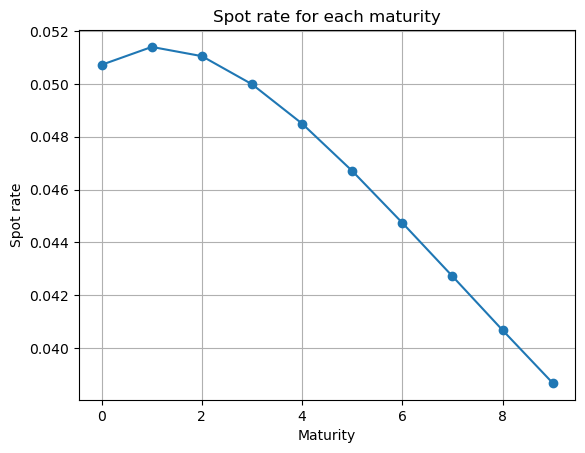

In [13]:
maturities = [bond.maturity for bond in bonds]
discount_factors = yield_curve.bootstrap_discount_factors_matrix()

spot_rates = []
for discount_factor, maturity in zip(discount_factors, maturities):
    spot_rate = (1/discount_factor)**(1/maturity) - 1
    spot_rates.append(spot_rate)
spot_rates = np.array(spot_rates)

plt.plot(spot_rates, "o-")
plt.title("Spot rate for each maturity")
plt.xlabel("Maturity")
plt.ylabel("Spot rate")
plt.grid(True)

### f) [2.0] Determine the YTM for each bond and plot them


In [16]:
#!pip install numpy-financial


In [17]:
import numpy_financial as npf # só está disponível aqui

#prices é array/lista de preços e cfs é matrix de cashflows
def bond_ytm(prices, cfs):
    data = np.column_stack((-np.array(prices), cfs))
    return [npf.irr(bond) for bond in data]

yields = bond_ytm(np.array(df['Dirty-price']), yield_curve.cashflows())
yields

[0.050724637681159424,
 0.051394797457705366,
 0.05105360885671528,
 0.05002601840832166,
 0.04860682295334251,
 0.04693075263753643,
 0.04512745406521734,
 0.043310562386741136,
 0.04151381384099939,
 0.03979082425353209]

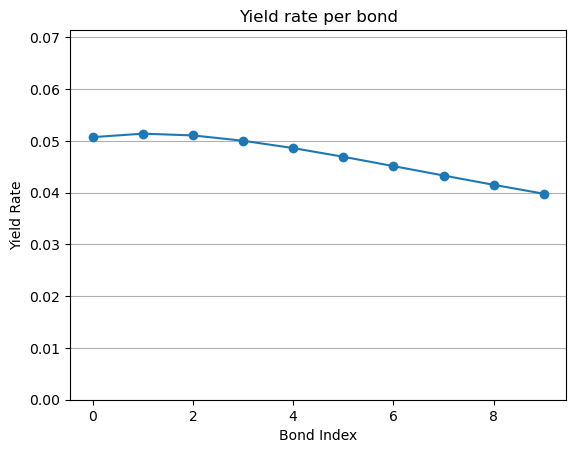

In [18]:
import matplotlib.pyplot as plt

plt.plot(yields, 'o-');
plt.title("Yield rate per bond");
plt.xlabel("Bond Index")
plt.ylabel("Yield Rate")
plt.ylim(0, max(yields)+0.02);
plt.grid(True, axis='y')

### g) [2.0] Determine the 1y forward rate starting in each of the years from 1 to 9 and plot them


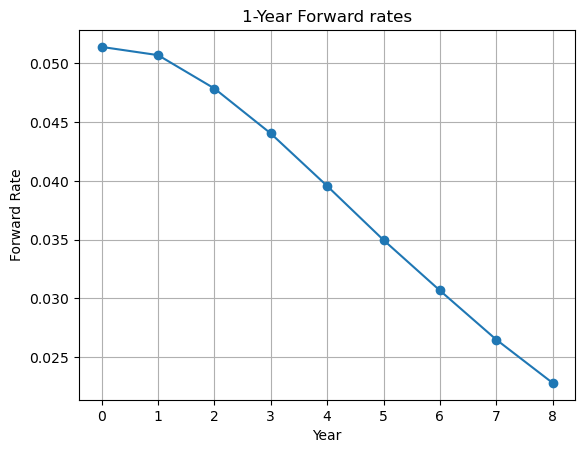

In [19]:
forward_rates = []

for year in range(1,10):
    if year == 1:
        forward_rate = spot_rates[year]
    else:
        forward_rate = (1+spot_rates[year])**(year) / (1+spot_rates[year-1])**(year-1) - 1
    forward_rates.append(forward_rate)

plt.plot(forward_rates, "o-")
plt.title("1-Year Forward rates")
plt.xlabel("Year")
plt.ylabel("Forward Rate")
plt.grid(True)

### h) [2.0] Make a plot of the spot rates, yields and forward rates with a legend identifying the series

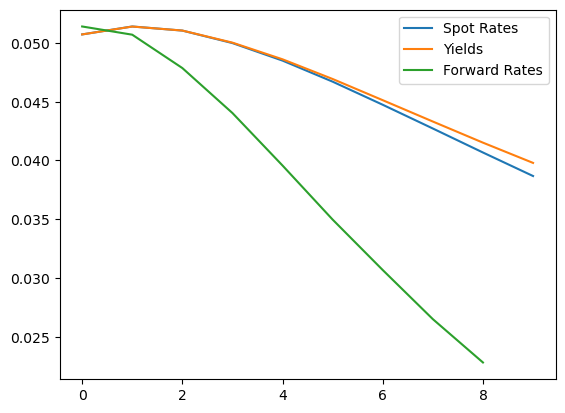

In [20]:
#spot_rates, yields, forward_rates
plt.figure()
plt.plot(spot_rates, label="Spot Rates")
plt.plot(yields, label="Yields")
plt.plot(forward_rates, label="Forward Rates")
plt.legend()

# 2. [5,0] DataFrames: write python code for the following tasks

### [1.0] Get historical data (close price and volume) for 5 stocks of your choice using any API of your choice from 2012 to the present time

In [21]:
import yfinance as yf

def get_stock_data(tickers):
    close_data = {}
    volume_data = {}
    for ticker in tickers:
        ticker_data = yf.download(ticker, start='2012-01-01')
        close_data[ticker], volume_data[ticker] = ticker_data['Adj Close'], ticker_data['Volume']
    return close_data, volume_data

In [22]:
import pandas as pd

tickers = ['MSFT', 'AMZN', 'NFLX', 'META', 'GOOGL']
stock_close_data, stock_volume_data = get_stock_data(tickers)

df_close = pd.DataFrame(stock_close_data)
df_volume = pd.DataFrame(stock_volume_data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [23]:
df_close.tail(5)

,MSFT,AMZN,NFLX,META,GOOGL
Date,,,,,
2024-07-19,437.109985,183.130005,633.340027,476.790009,177.660004
2024-07-22,442.940002,182.550003,647.500000,487.399994,181.669998
2024-07-23,444.850006,186.410004,642.760010,488.690002,181.789993
2024-07-24,428.899994,180.830002,635.989990,461.269989,172.630005
2024-07-25,NaN,182.477402,642.299988,459.015015,172.399994


In [24]:
df_volume.tail(5)

,MSFT,AMZN,NFLX,META,GOOGL
Date,,,,,
2024-07-19,20940400.0,43081800,9815600,15149400.0,18881900
2024-07-22,15808800.0,39931900,5219100,12023100.0,24100300
2024-07-23,13107100.0,47537700,2463600,9455500.0,36352700
2024-07-24,26761700.0,41455000,4884400,17624900.0,49520400
2024-07-25,NaN,23711128,2027726,10622490.0,16359668


### [1.0] Plot the cumulative returns of the stocks on a single chart

C:\Users\tbellas\AppData\Local\Temp\ipykernel_29008\1519035545.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_returns = df_close.pct_change()


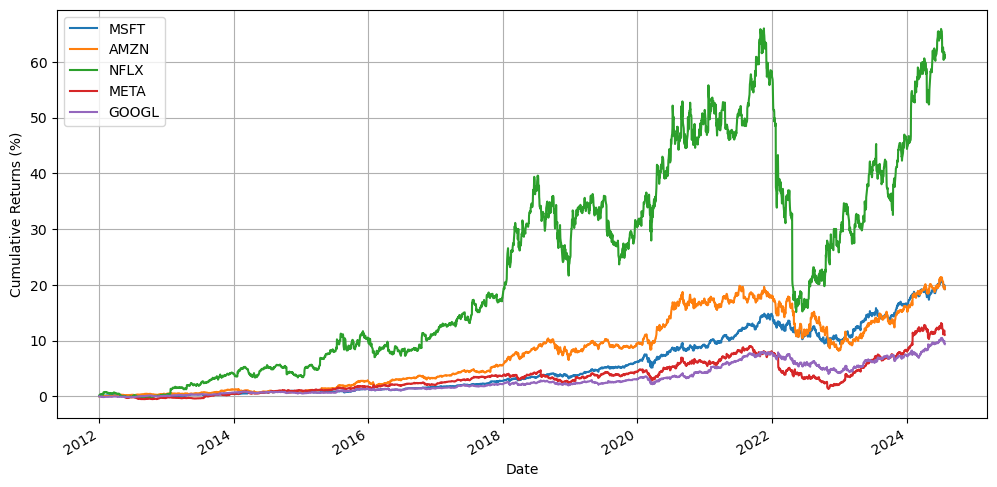

In [25]:
df_returns = df_close.pct_change()
df_cumulative_returns = (1 + df_returns).cumprod() - 1
df_cumulative_returns.plot(xlabel='Date', ylabel='Cumulative Returns (%)', grid=True, figsize=(12,6));

### [1.0] Create the correlation matrix of the daily returns

In [26]:
daily_returns_corr_matrix = df_returns.corr()
daily_returns_corr_matrix

,MSFT,AMZN,NFLX,META,GOOGL
MSFT,1.000000,0.575527,0.372343,0.470349,0.649976
AMZN,0.575527,1.000000,0.437980,0.504366,0.602914
NFLX,0.372343,0.437980,1.000000,0.347692,0.383816
META,0.470349,0.504366,0.347692,1.000000,0.538263
GOOGL,0.649976,0.602914,0.383816,0.538263,1.000000


### [1.0] Save the data (close price and volume) to a CSV file for each ticker

In [27]:
joined_df = pd.DataFrame({ 'Close': df_close['MSFT'], 'Volume': df_volume['MSFT'] }, index=df_close.index)
joined_df

,Close,Volume
Date,,
2012-01-03,21.200512,64731500.0
2012-01-04,21.699442,80516100.0
2012-01-05,21.921188,56081400.0
2012-01-06,22.261730,99455500.0
2012-01-09,21.968704,59706800.0
...,...,...
2024-07-19,437.109985,20940400.0
2024-07-22,442.940002,15808800.0
2024-07-23,444.850006,13107100.0


In [28]:
for ticker in tickers:
    joined_df = pd.DataFrame({ f'Close_{ticker}': df_close[ticker], f'Volume_{ticker}': df_volume[ticker] }, index=df_close.index)
    joined_df.to_csv(f"{ticker}.csv")

### [1.0] Load the data from the CSV files you saved into a single DataFrame with the prices for each ticker

In [29]:
csv_dfs = [pd.read_csv(f'{ticker}.csv') for ticker in tickers]
csv_dfs

[            Date  Close_MSFT  Volume_MSFT
 0     2012-01-03   21.200512   64731500.0
 1     2012-01-04   21.699442   80516100.0
 2     2012-01-05   21.921188   56081400.0
 3     2012-01-06   22.261730   99455500.0
 4     2012-01-09   21.968704   59706800.0
 ...          ...         ...          ...
 3155  2024-07-19  437.109985   20940400.0
 3156  2024-07-22  442.940002   15808800.0
 3157  2024-07-23  444.850006   13107100.0
 3158  2024-07-24  428.899994   26761700.0
 3159  2024-07-25         NaN          NaN
 
 [3160 rows x 3 columns],
             Date  Close_AMZN  Volume_AMZN
 0     2012-01-03    8.951500    102216000
 1     2012-01-04    8.875500     84104000
 2     2012-01-05    8.880500     76182000
 3     2012-01-06    9.130500    140168000
 4     2012-01-09    8.928000    101138000
 ...          ...         ...          ...
 3155  2024-07-19  183.130005     43081800
 3156  2024-07-22  182.550003     39931900
 3157  2024-07-23  186.410004     47537700
 3158  2024-07-24  180.830

In [30]:
loaded_csv_df = pd.DataFrame()

for csv_df in csv_dfs:
    loaded_csv_df = pd.concat([loaded_csv_df, csv_df], axis=1)

#Remover colunas de volume
loaded_csv_df = loaded_csv_df.drop(columns=[f'Volume_{ticker}' for ticker in tickers])

#Solução elegante para remover colunas date duplicadas: https://stackoverflow.com/a/40435354/10280626
loaded_csv_df = loaded_csv_df.iloc[:, ~loaded_csv_df.columns.duplicated(keep='first')]

#Definir coluna de Date como index
loaded_csv_df = loaded_csv_df.set_index('Date')

loaded_csv_df

,Close_MSFT,Close_AMZN,Close_NFLX,Close_META,Close_GOOGL
Date,,,,,
2012-01-03,21.200512,8.951500,10.320000,NaN,16.632812
2012-01-04,21.699442,8.875500,11.492857,NaN,16.704554
2012-01-05,21.921188,8.880500,11.328571,NaN,16.472836
2012-01-06,22.261730,9.130500,12.327143,NaN,16.248119
2012-01-09,21.968704,8.928000,14.025714,NaN,15.559219
...,...,...,...,...,...
2024-07-19,437.109985,183.130005,633.340027,476.790009,177.660004
2024-07-22,442.940002,182.550003,647.500000,487.399994,181.669998
2024-07-23,444.850006,186.410004,642.760010,488.690002,181.789993


In [31]:
'Close_MSFT'['Close_MSFT'.find('_')+1:]

'MSFT'

In [32]:
loaded_csv_df = loaded_csv_df.rename(lambda column_name: column_name[column_name.find('_')+1 : ], axis='columns')
loaded_csv_df

,MSFT,AMZN,NFLX,META,GOOGL
Date,,,,,
2012-01-03,21.200512,8.951500,10.320000,NaN,16.632812
2012-01-04,21.699442,8.875500,11.492857,NaN,16.704554
2012-01-05,21.921188,8.880500,11.328571,NaN,16.472836
2012-01-06,22.261730,9.130500,12.327143,NaN,16.248119
2012-01-09,21.968704,8.928000,14.025714,NaN,15.559219
...,...,...,...,...,...
2024-07-19,437.109985,183.130005,633.340027,476.790009,177.660004
2024-07-22,442.940002,182.550003,647.500000,487.399994,181.669998
2024-07-23,444.850006,186.410004,642.760010,488.690002,181.789993
